In [3]:
import pandas as pd
import numpy as np

In [240]:
birthwt = pd.read_csv('../../data/birthwt.csv')

In [498]:
abs_crosstab = pd.crosstab(index=birthwt['low'], columns=birthwt['race'], margins=True)
abs_crosstab.index = ['No', 'Yes', 'All']
abs_crosstab.columns = ['White', 'Black', 'Other', 'All']
abs_crosstab

,White,Black,Other,All
No,73,15,42,130
Yes,23,11,25,59
All,96,26,67,189


In [499]:
rel_crosstab = abs_crosstab.div(abs_crosstab['All']['All'])
rel_crosstab

,White,Black,Other,All
No,0.386243,0.079365,0.222222,0.687831
Yes,0.121693,0.058201,0.132275,0.312169
All,0.507937,0.137566,0.354497,1.000000


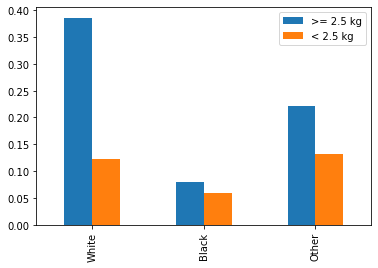

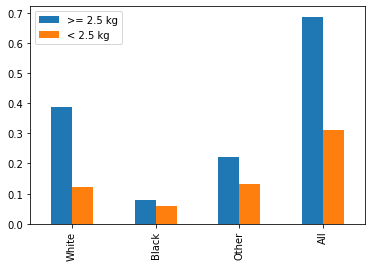

In [502]:
rel_crosstab.loc[['No', 'Yes']].transpose().loc[['White', 'Black', 'Other']].plot.bar().legend(
    [">= 2.5 kg","< 2.5 kg"])
# The same
rel_crosstab[:-1].transpose().plot.bar().legend([">= 2.5 kg","< 2.5 kg"])

In [503]:
abs_crosstab = pd.crosstab(index=birthwt['low'], columns=[birthwt['race'], birthwt['smoke']])
abs_crosstab.index = pd.Index(['No', 'Yes'], name='low')
abs_crosstab.columns = pd.MultiIndex.from_product([['White', 'Black', 'Other'], ['No', 'Yes']], 
                                                  names=['race', 'smoke'])
abs_crosstab['All'] = abs_crosstab.sum(axis=1)
total = abs_crosstab.sum(axis=0)
total.name = 'All'
abs_crosstab = abs_crosstab.append(total)
abs_crosstab

race  White     Black     Other      All
smoke    No Yes    No Yes    No Yes     
low                                     
No       40  33    11   4    35   7  130
Yes       4  19     5   6    20   5   59
All      44  52    16  10    55  12  189

In [506]:
rel_crosstab = abs_crosstab.div(abs_crosstab['All']['All'])
rel_crosstab

race      White               Black               Other                 All
smoke        No       Yes        No       Yes        No       Yes          
low                                                                        
No     0.211640  0.174603  0.058201  0.021164  0.185185  0.037037  0.687831
Yes    0.021164  0.100529  0.026455  0.031746  0.105820  0.026455  0.312169
All    0.232804  0.275132  0.084656  0.052910  0.291005  0.063492  1.000000

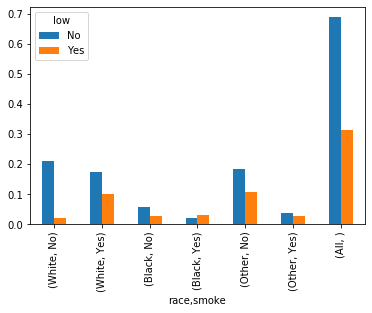

In [508]:
rel_crosstab[:-1].T.plot.bar()